In [1]:
import numpy as np
import pandas as pd
import math

In [2]:
#some attributes in data having "unknown" need to replace with NA'S

In [201]:
data = pd.read_csv("bank-additional-full.csv", na_values=["unknown"])

In [202]:
data.shape

(41188, 22)

In [203]:
data.head()

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,57,services,married,high.school,NaN,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [204]:
#checking for missing values in data
data.isnull().sum()

customer_no           0
age                   0
job                 330
marital              80
education          1728
credit_default     8597
housing             990
loan                990
contact               0
contacted_month       0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp_var_rate          0
cons_price_idx        0
cons_conf_idx         0
euribor3m             0
nr_employed           0
y                     0
dtype: int64

observation:
1)There are missing values in data need to replace

In [205]:
def understand_data(data) :
    return(pd.DataFrame({"Datatype":data.dtypes,
                         "No of NAs":data.isna().sum(),
                         "No of Levels":data.apply(lambda x: x.nunique(),axis=0),
                         "Levels":data.apply(lambda x: str(x.unique()),axis=0)}))

In [206]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
customer_no,int64,0,41188,[ 1 2 3 ... 41186 41187 41188]
age,int64,0,78,[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 ...
job,object,330,11,['housemaid' 'services' 'admin.' 'blue-collar'...
marital,object,80,3,['married' 'single' 'divorced' nan]
education,object,1728,8,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
credit_default,object,8597,2,['no' nan 'yes']
housing,object,990,2,['no' 'yes' nan]
loan,object,990,2,['no' 'yes' nan]
contact,object,0,2,['telephone' 'cellular']
contacted_month,object,0,10,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...


observations:
1)"customer_no" column not req'd
2)convert "age", "pdays" to categorical, then drop these columns
3)there are NA's in categorical column not req'd, need to replace
4)some columns should be converted to categorical
5)need to be label encode target variable

<AxesSubplot:>

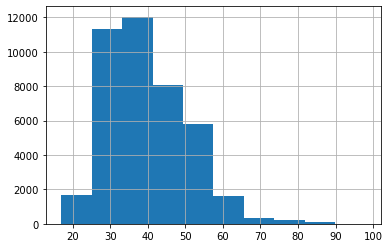

In [207]:
#Conveting "age" to categorical column based on distribution
data.age.hist()

In [208]:
data["age_bin"] = pd.cut(data["age"],bins=[0,26,34,41,49,57,65,100],labels=["<=26","27-34","35-41","42-49","50-57","58-65","66-100"])

In [209]:
data.head()

,customer_no,age,job,marital,education,credit_default,housing,loan,contact,contacted_month,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_bin
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-57
1,2,57,services,married,high.school,NaN,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-57
2,3,37,services,married,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,35-41
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,35-41
4,5,56,services,married,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,50-57


In [210]:
#Conveting "pdays" to categorical column based on distribution

In [211]:
data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
20         1
25         1
26         1
27         1
Name: pdays, dtype: int64

In [212]:
def binning(pdays):

    if(pdays == 999):
        bin = "NC"
    elif(pdays>0 and pdays<=5):
        bin = "CR"
    elif(pdays>5 and pdays<10):
        bin = "NCR"
    elif(pdays>11 and pdays<15):
        bin = "BAW"
    else:
        bin = "LT"
    return(bin)


In [213]:
data["pdays_bins"] = data["pdays"].apply(lambda x:binning(x))

In [214]:
data["pdays_bins"].value_counts()

NC     39673
CR       690
NCR      554
LT       157
BAW      114
Name: pdays_bins, dtype: int64

In [215]:
#drop "customer_no","age", "pdays" columns

In [216]:
data = data.drop(["customer_no","age","pdays"],axis=1)

In [217]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
job,object,330,11,['housemaid' 'services' 'admin.' 'blue-collar'...
marital,object,80,3,['married' 'single' 'divorced' nan]
education,object,1728,8,['basic.4y' 'high.school' 'basic.6y' 'basic.9y...
credit_default,object,8597,2,['no' nan 'yes']
housing,object,990,2,['no' 'yes' nan]
loan,object,990,2,['no' 'yes' nan]
contact,object,0,2,['telephone' 'cellular']
contacted_month,object,0,10,['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'ma...
day_of_week,object,0,5,['mon' 'tue' 'wed' 'thu' 'fri']
duration,int64,0,1544,[ 261 149 226 ... 1246 1556 1868]


In [218]:
#select numerical columns and categorical columns

In [219]:
numeric_list = data.select_dtypes(["int64","float64"]).columns

In [220]:
 categorical_list = ['job', 'marital', 'education', 'credit_default', 'housing', 'loan',
       'contact', 'contacted_month', 'day_of_week', 'poutcome', 'age_bin',
       'pdays_bins']

In [221]:
data[categorical_list] = data[categorical_list].astype("category")

In [222]:
understand_data(data)

,Datatype,No of NAs,No of Levels,Levels
job,category,330,11,"['housemaid', 'services', 'admin.', 'blue-coll..."
marital,category,80,3,"['married', 'single', 'divorced', NaN]\nCatego..."
education,category,1728,8,"['basic.4y', 'high.school', 'basic.6y', 'basic..."
credit_default,category,8597,2,"['no', NaN, 'yes']\nCategories (2, object): ['..."
housing,category,990,2,"['no', 'yes', NaN]\nCategories (2, object): ['..."
loan,category,990,2,"['no', 'yes', NaN]\nCategories (2, object): ['..."
contact,category,0,2,"['telephone', 'cellular']\nCategories (2, obje..."
contacted_month,category,0,10,"['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'de..."
day_of_week,category,0,5,"['mon', 'tue', 'wed', 'thu', 'fri']\nCategorie..."
duration,int64,0,1544,[ 261 149 226 ... 1246 1556 1868]


In [223]:
data.shape

(41188, 21)

In [224]:
len(numeric_list)

8

In [225]:
len(categorical_list)

12

In [226]:
data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [227]:
data["y"].value_counts(normalize=True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [228]:
#label encoding the target variable
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [229]:
le = LabelEncoder()
le.fit(data["y"])

LabelEncoder()

In [230]:
data["y"] = le.transform(data["y"])

In [231]:
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [232]:
#split the data into train and test

In [233]:
from sklearn.model_selection import train_test_split

In [234]:
X = data.drop(["y"],axis=1)
y = data["y"]

In [235]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=123)

In [236]:
y_train.value_counts(normalize=True)*100

0    88.734446
1    11.265554
Name: y, dtype: float64

In [237]:
y_test.value_counts(normalize=True)*100

0    88.73513
1    11.26487
Name: y, dtype: float64

In [238]:
X_train.shape

(32950, 20)

In [239]:
X_test.shape

(8238, 20)

In [240]:
#scaling , dummfication, imputation using datamapper

In [241]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 

In [242]:
from sklearn_pandas import DataFrameMapper

In [243]:
mapper = DataFrameMapper(
          [([cont_col],StandardScaler()) for cont_col in numeric_list]+
          [([cat_col],[SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore")]) for cat_col in categorical_list]
          ,df_out=True)

In [244]:
mapper.fit(X_train)

DataFrameMapper(df_out=True, drop_cols=[],
                features=[(['duration'], StandardScaler()),
                          (['campaign'], StandardScaler()),
                          (['previous'], StandardScaler()),
                          (['emp_var_rate'], StandardScaler()),
                          (['cons_price_idx'], StandardScaler()),
                          (['cons_conf_idx'], StandardScaler()),
                          (['euribor3m'], StandardScaler()),
                          (['nr_employed'], StandardScaler()),
                          (['job'],
                           [SimpleImputer(...
                           [SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(handle_unknown='ignore')]),
                          (['poutcome'],
                           [SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(handle_unknown='ignore')]),
                          (['age_bin'],
                 

In [245]:
X_train = mapper.transform(X_train)
X_test = mapper.transform(X_test)

In [193]:
X_train.head()

,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_x0_admin.,job_x0_blue-collar,...,age_bin_x0_42-49,age_bin_x0_50-57,age_bin_x0_58-65,age_bin_x0_66-100,age_bin_x0_<=26,pdays_bins_x0_BAW,pdays_bins_x0_CR,pdays_bins_x0_LT,pdays_bins_x0_NC,pdays_bins_x0_NCR
14423,1.038436,0.164668,-0.350513,0.841151,0.596575,-0.473938,0.773848,0.846423,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7079,0.703190,-0.571483,-0.350513,0.650281,0.727939,0.883379,0.715618,0.333029,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40787,0.529786,-0.203408,-0.350513,-0.749433,1.082276,0.646387,-1.579580,-2.813755,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35130,1.169452,-0.203408,-0.350513,-1.194796,-1.175111,-1.228003,-1.365684,-0.938692,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7515,-0.287136,-0.203408,-0.350513,0.650281,0.727939,0.883379,0.717924,0.333029,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [194]:
set(X_train.columns) - set(X_test.columns)

set()

In [195]:
set(X_test.columns) - set(X_train.columns)

set()

In [196]:
X_train.shape

(32950, 68)

In [197]:
X_test.shape

(8238, 68)

In [54]:
y_train.value_counts(normalize=True)*100

0    88.734446
1    11.265554
Name: y, dtype: float64

In [55]:
y_test.value_counts(normalize=True)*100

0    88.73513
1    11.26487
Name: y, dtype: float64

In [56]:
X_train.isnull().sum()

duration             0
campaign             0
previous             0
emp_var_rate         0
cons_price_idx       0
                    ..
pdays_bins_x0_BAW    0
pdays_bins_x0_CR     0
pdays_bins_x0_LT     0
pdays_bins_x0_NC     0
pdays_bins_x0_NCR    0
Length: 68, dtype: int64

In [57]:
X_test.isnull().sum()

duration             0
campaign             0
previous             0
emp_var_rate         0
cons_price_idx       0
                    ..
pdays_bins_x0_BAW    0
pdays_bins_x0_CR     0
pdays_bins_x0_LT     0
pdays_bins_x0_NC     0
pdays_bins_x0_NCR    0
Length: 68, dtype: int64

In [58]:
#Defining Error Metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_F1_Score','Test_Accuracy','Test_Recall','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted)
  #  train_precision= precision_score(train_actual,train_predicted)
    train_f1score  = f1_score(train_actual,train_predicted)
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted)
    #test_precision= precision_score(test_actual,test_predicted)
    test_f1score  = f1_score(test_actual,test_predicted)
    #dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            #test_accuracy,test_recall,test_precision,test_f1score],
                                           #index=scores.columns ), ignore_index=True)
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_f1score,
                                            test_accuracy,test_recall,test_f1score],
                                           index=scores.columns ), ignore_index=True)
            
            
    return(dataframe)

In [59]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [60]:
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

In [61]:
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [62]:
#1)Logistic regression

In [63]:
clf_lg = LogisticRegression()

In [64]:
clf_lg.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred_train = clf_lg.predict(X_train)
y_pred_test = clf_lg.predict(X_test)

In [66]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9308    0.9730    0.9515     29238
           1     0.6696    0.4302    0.5239      3712

    accuracy                         0.9119     32950
   macro avg     0.8002    0.7016    0.7377     32950
weighted avg     0.9014    0.9119    0.9033     32950


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9299    0.9721    0.9505      7310
           1     0.6577    0.4224    0.5144       928

    accuracy                         0.9102      8238
   macro avg     0.7938    0.6973    0.7325      8238
weighted avg     0.8992    0.9102    0.9014      8238



In [67]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Logistic Regression",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_F1_Score,Test_Accuracy,Test_Recall,Test_F1_Score
0,Logistic Regression,0.911897,0.430226,0.523864,0.910172,0.422414,0.514436


In [68]:
#Decision Tree
clf_dt = DecisionTreeClassifier(max_depth=5,class_weight="balanced")

In [69]:

clf_dt.fit(X_train, y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

In [70]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     0.9901    0.8212    0.8978     29238
           1     0.3990    0.9353    0.5594      3712

    accuracy                         0.8340     32950
   macro avg     0.6946    0.8783    0.7286     32950
weighted avg     0.9235    0.8340    0.8596     32950


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9904    0.8194    0.8968      7310
           1     0.3973    0.9375    0.5581       928

    accuracy                         0.8327      8238
   macro avg     0.6938    0.8785    0.7274      8238
weighted avg     0.9236    0.8327    0.8587      8238



In [71]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTrees",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_F1_Score,Test_Accuracy,Test_Recall,Test_F1_Score
0,Logistic Regression,0.911897,0.430226,0.523864,0.910172,0.422414,0.514436
1,DecisionTrees,0.834021,0.935345,0.559414,0.832726,0.937500,0.558050


In [72]:
##Decision Tree with best parameters
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

In [73]:
dt = DecisionTreeClassifier(class_weight="balanced")
clf_dtb = GridSearchCV(dt, param_grid, cv = 10)
clf_dtb.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [74]:
y_pred_train = clf_dtb.predict(X_train)
y_pred_test = clf_dtb.predict(X_test)

In [75]:
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000     29238
           1     1.0000    1.0000    1.0000      3712

    accuracy                         1.0000     32950
   macro avg     1.0000    1.0000    1.0000     32950
weighted avg     1.0000    1.0000    1.0000     32950


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0     0.9372    0.9436    0.9404      7310
           1     0.5308    0.5022    0.5161       928

    accuracy                         0.8939      8238
   macro avg     0.7340    0.7229    0.7282      8238
weighted avg     0.8914    0.8939    0.8926      8238



In [76]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTrees_Best par",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_F1_Score,Test_Accuracy,Test_Recall,Test_F1_Score
0,Logistic Regression,0.911897,0.430226,0.523864,0.910172,0.422414,0.514436
1,DecisionTrees,0.834021,0.935345,0.559414,0.832726,0.937500,0.558050
2,DecisionTrees_Best par,1.000000,1.000000,1.000000,0.893906,0.502155,0.516058


In [77]:
##KNN

In [78]:
parameters = {'n_neighbors':list(range(2,12))}

clf_knn = GridSearchCV(KNeighborsClassifier(metric="euclidean", n_jobs=-1),
                   parameters,verbose=1, cv=5,scoring='recall')

clf_knn.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_jobs=-1),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             scoring='recall', verbose=1)

In [79]:
y_pred_train = clf_knn.predict(X_train)
y_pred_test = clf_knn.predict(X_test)

In [80]:
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"KNN",scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_F1_Score,Test_Accuracy,Test_Recall,Test_F1_Score
0,Logistic Regression,0.911897,0.430226,0.523864,0.910172,0.422414,0.514436
1,DecisionTrees,0.834021,0.935345,0.559414,0.832726,0.937500,0.558050
2,DecisionTrees_Best par,1.000000,1.000000,1.000000,0.893906,0.502155,0.516058
3,KNN,0.940546,0.636045,0.706780,0.902039,0.452586,0.510018


In [246]:
data1 = pd.read_csv("test_data.csv",na_values=["unknown"])

In [266]:
data1.credit_default.value_counts()

no    3287
Name: credit_default, dtype: int64

In [267]:
data.head()

,job,marital,education,credit_default,housing,loan,contact,contacted_month,day_of_week,duration,...,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,age_bin,pdays_bins
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-57,NC
1,services,married,high.school,NaN,no,no,telephone,may,mon,149,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-57,NC
2,services,married,high.school,no,yes,no,telephone,may,mon,226,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,35-41,NC
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,35-41,NC
4,services,married,high.school,no,no,yes,telephone,may,mon,307,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,50-57,NC


In [248]:
labels = data1["customer_no"]

In [249]:
data1["age_bin"] = pd.cut(data1["age"],bins=[0,26,34,41,49,57,65,100],labels=["<=26","27-34","35-41","42-49","50-57","58-65","66-100"])

In [250]:
data1["pdays_bins"] = data1["pdays"].apply(lambda x:binning(x))

In [251]:
data1 = data1.drop(["customer_no","age","pdays"],axis=1)

In [252]:
numeric_list = data1.select_dtypes(["int64","float64"]).columns

In [253]:
 categorical_list = ['job', 'marital', 'education', 'credit_default', 'housing', 'loan',
       'contact', 'contacted_month', 'day_of_week', 'poutcome', 'age_bin',
       'pdays_bins']

In [254]:
data[categorical_list] = data[categorical_list].astype("category")

In [255]:
data1.shape

(4119, 20)

In [256]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer 

In [258]:
test_data = mapper.transform(data1)

In [259]:
test_data.shape

(4119, 68)

In [269]:
X_train.columns

Index(['duration', 'campaign', 'previous', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'job_x0_admin.',
       'job_x0_blue-collar', 'job_x0_entrepreneur', 'job_x0_housemaid',
       'job_x0_management', 'job_x0_retired', 'job_x0_self-employed',
       'job_x0_services', 'job_x0_student', 'job_x0_technician',
       'job_x0_unemployed', 'marital_x0_divorced', 'marital_x0_married',
       'marital_x0_single', 'education_x0_basic.4y', 'education_x0_basic.6y',
       'education_x0_basic.9y', 'education_x0_high.school',
       'education_x0_illiterate', 'education_x0_phd',
       'education_x0_professional.course', 'education_x0_university.degree',
       'credit_default_x0_no', 'credit_default_x0_yes', 'housing_x0_no',
       'housing_x0_yes', 'loan_x0_no', 'loan_x0_yes', 'contact_x0_cellular',
       'contact_x0_telephone', 'contacted_month_x0_apr',
       'contacted_month_x0_aug', 'contacted_month_x0_dec',
       'contacted_month_x0_jul', 'conta

In [268]:
set(X_train.columns) - set(test_data.columns)

set()

In [261]:
data.credit_default.value_counts()

no     32588
yes        3
Name: credit_default, dtype: int64

In [262]:
data1.credit_default.value_counts()

no    3287
Name: credit_default, dtype: int64

In [263]:
test_data.rename(columns = {'credit_default':'credit_default_x0_no'}, inplace = True)

In [264]:
set(X_train.columns) - set(test_data.columns)

set()

In [265]:
set(test_data.columns)-set(X_train.columns)

set()

In [278]:
pred_test = clf_dt.predict(test_data)
pred_test

array([1, 1, 0, ..., 0, 0, 0])

In [282]:
test_submissions = pd.read_csv('sample_Submission.csv')
test_submissions.head()

,customer_no,y
0,15725,0
1,28030,0
2,17730,0
3,15377,0
4,7763,0


In [283]:
test_submissions['y'] = pred_test
test_submissions.head()

,customer_no,y
0,15725,1
1,28030,1
2,17730,0
3,15377,0
4,7763,0


In [284]:
test_submissions.to_csv('test_predictions.csv', index = False)

In [288]:
pd.concat([pd.DataFrame(labels), pd.DataFrame(pred_test, columns = ['y'])], axis = 1)

,customer_no,y
0,15725,1
1,28030,1
2,17730,0
3,15377,0
4,7763,0
...,...,...
4114,29292,1
4115,6921,0
4116,35366,0
4117,5342,0


In [289]:
test_submissions

,customer_no,y
0,15725,1
1,28030,1
2,17730,0
3,15377,0
4,7763,0
...,...,...
4114,29292,1
4115,6921,0
4116,35366,0
4117,5342,0


In [290]:
test_res = pd.read_csv("SolutionFile.csv")

In [292]:
print(classification_report(y_true=test_res["y"],y_pred=test_submissions["y"]))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      3657
           1       0.41      0.94      0.57       462

    accuracy                           0.84      4119
   macro avg       0.70      0.88      0.73      4119
weighted avg       0.92      0.84      0.86      4119

